# Explainer Notebook for Harry Potter Network Analysis

This explainer notebook contains the code and detailed analysis about our work on Harry Potter network.   
The webside for presenting our work is here(<font color=red>the link</font>).

<font color=red>Maybe some more general information here</font>
    

### 1. Motivation 
<!--
* What is your dataset?
* Why did you choose this/these particular dataset(s)?
* What was your goal for the end user's experience?
-->

#### Harry Potter Network Dataset

Our dataset is the characters from Harry Potter Novel, including character relationships, character attributes, characer stories.
We got the dataset using API from Fandom pages. Also, J.K rolling’s books will be used as our data source as well.    
<font color=orange>(not enough, we build this dataset by blabla, what source we use, how we get things done. 
simple discrption of the dataset , includeing: amount of nodes, edges, size of files.
the strength(big, contains lots of characters) ;  node attributes
some limitations: the potential problems of this dataset)</font>

#### Why we choose this dataset?

**First of all**, this dataset has a very complete structure of character relations, which is a perfct material for social network analysis.
**Moreover**, there are some particularly interesting studies of the relationship between universes, such as those between wizards and Muggles (non-wizards), from which we hope to derive the new X-degree of separation for whole universe.
**Also**, the division of the four major colleges systems within the Hogwarts also caught our attention, and we wanted to find the attributes and patterns so that everyone could know which house they were assigned to.
**Finally**, the Harry Potter novel accompanies almost everyone's childhood, most of people are very familiar with the characters and stories, hence, it will be easier to understand the outcomes of our exploration. And it would be exciting to explore new discoveries from familiar stories and relationships.

<font color=orange>需要更有逻辑，现在这个非常散，这个可以做完后面的再来写</font>


#### Our goal for end user's experience

**Through our project, we hope that users will be able to:**

View the social network structure of the characters.
Get the basic statistics of the social network, such as how many characters involved (nodes), how many relationships they have (links) and so on.
Understand the social network node attributes and corresponding social network structures (For instance: Four colleges; Muggle world& Wizarding World, Dark magic& Good Wizard).
Follow the community detection of the social network (four colleges in Hogwarts) and be able to see how the generated community detections differs from the original allocation result.
Know the keywords for each community.
From clustering the sentiment detection/analysis of the characters, understand the general emotional tone of the characters in the book.


**As for the rendering part of the web page (more technical), we hope that we could:**

Implement partitioning of content
Interactive the visualization of social networks(for instance, zoom in and zoom out,etc)
Implement machine learning and data interaction: Predicting which college the character belongs to
Implement data interaction: give a character and the 10 most relevant characters; Or give the soical network associated with the character

<font color=orange>这块是我之前列大纲的时候写的，如果写在这里需要展开+流畅，小点读不太通，没有前因后果</font>


In [1]:
import json
import networkx as nx
from nltk.tokenize import word_tokenize
import nltk
from tqdm import tqdm
import os
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 2. Basic stats
<!--
* Write about your choices in data cleaning and preprocessing
* Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)
-->

<这一块nina整理>

#### 2.1 data cleaning and preprocessing

<font color=orange>这块还是需要注意 **解释**(*每一步: 为什么这么做，具体怎么做的，分析结果*)， 代码保留需要的即可，不要大段打印。</font>

<font color=tomato>(a) **cleaning the node.**  
    the ceritions; (清理原则123，顺便这里可以提一嘴是怎么收集数据的所以需要这样子的清理。)  
    the amount of nodes after cleaning.  
    (b) **cleaning the fandom page**
    掐头去尾+去掉html格式；   
    原因;    
    具体步骤；  
    得到的具体的东西（描述即可不需展示）   
    (c) **书籍的cleaning**
    为什么要这么做；  
    具体步骤；得到的具体的东西（描述即可不需展示）</font>
    
    
    
#### 2.2 basic statiatic of our dataset


<font color=tomato>   
node数量， edge数量，       
    degree分布（注意log-log图+ 分析） ；   
      \gama值；  
    （还有啥能做的不知道了需要再翻翻network science,反正就是能反应网络特性的一些东西）    
   然后记得加分析

</font>


### 3. Tools, theory and analysis. 
<!--
* Talk about how you've worked with text, including regular expressions, unicode, etc.
* Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
* How did you use the tools to understand your dataset?
-->

(写得再流畅一点，承上启下那种，逻辑再好点，现在瞎写的)
The questions that we interested about this dataset is：
1. 麻瓜世界与魔法世界的联系。
哈利波特的故事里除了无比强大的巫师们，还有不懂魔法的麻瓜们。对于大多数麻瓜们来说，他们是不知道有魔法世界的存在的，但是麻瓜和魔法世界又有着不可分割的关系。我们想知道：麻瓜世界和魔法世界的是如何连接的？是否有一些关键的结点？两个世界的大小，属性如何？是否有类似于six degree of separation的定律存在于魔法、麻瓜世界 已经两个世界中？ 

2. 四个学院的特征属性。
霍格沃兹有四个学院，在新生入学时，分院帽会将新生分到四个学院中的一个。根据JK罗琳对魔法世界的设定，分院帽会按照学生的特质进行分院——也就是说，每个学院应有自己特有的一些特征。比如，广泛认为，格兰芬多热情勇敢果决。我们想知道通过对fandom页面的文本分析+书的文本分析，来提取每个学院的关键词，得到其属性。

3. 哈利波特世界中人物的情感分析。
作为一个儿童读物，哈利波特中的人物具有鲜明的性格特点和感情倾向，我们很好奇，哪些人物更积极、开心；而哪些人物更加的阴郁、低落？同时我们也相对四个学院的社区进行这样的检测。

4. 利用文本信息的社区检测。
在社区检测方法中，权重值一直被我们所忽略。事实上，在人物A和B，C均认识的情况下，他们之间的关系紧密的强弱并不相同。我们利用文本信息，设计两个节点之间边的权重，再进行社区检测算法。我们将此算法应用在霍格沃兹学院内，讲通过算法产生的分隔与分院帽的结果进行对比，分析之间的不同并探索how smart the sorting hat is.

5. 预测分院结果。
输入一段文字描述，你将会被分到哪一个学院呢？我们希望可以将之前在网络中学习到知识与ML相结合，让哈迷们体验一下自己与哪个学院的特质更相近。

#### 3.1 The connection between magic universe and muggle universe

(解释这个问题，问题的有趣性，我们想要探索的内容blabla)  

(子网络的大小属性)

(子网络的连接关系，有无关键节点，是什么，分析)

(six degree of separation定律的验证和分析)

注意分析解释，想想对面是一个不知道哈利波特的人！

#### 3.2  The most representative words for each house in Hogwarts

问题描述。  

如何获取学院属性。  子网络大小。   

文本分析的具体步骤。

结果分析。与JK罗琳的设定进行对比。


#### 3.2.1 The Interesting Question
【文本: 介绍问题的背景（不需要限于下方文字片段可以展开），为什么这个问题有趣】  
*可参考*：四个学院的特征属性。 霍格沃兹有四个学院，在新生入学时，分院帽会将新生分到四个学院中的一个。根据JK罗琳对魔法世界的设定，分院帽会按照学生的特质进行分院——也就是说，每个学院应有自己特有的一些特征。比如，广泛认为，格兰芬多热情勇敢果决。我们想知道通过对fandom页面的文本分析+书的文本分析，来提取每个学院的关键词，得到其属性。

#### 3.2.2 Get the Hogwarts subnetwork from Fandom  
【文本部分：
Fandom上有霍格沃兹学院的catogory  根据此我们可以构建hogwarts学院的dict 并抽取子网络
】  

【代码可无：】

#### 3.2.3 Extract the representative words for each house
In this section, both **TF-TR** and **TF-IDF** are attempted.
<br>So just to simply summarize the important highlights for this section:
<br>(1)Modify the formula for calculating <b>TF</b> to reduce the influence of <b>TF</b>.
<br>(2)Remove the names of characters in the lists of words.
<br>(3)Take the adjective words.


>Step one: TRY <b>TF-IDF</b>

>**TF-IDF:**<br>
**TF** stands for <b>Term frequency</b>, which represents for 
<b><center>The weight of a term that occurs in a document is simply proportional to the term frequency.</center></b>
From six weighting scheme, the double normalization 0.5 is chosen by us because the augmented frequency helps prevent the bias towards longer documents.
$$tf(t,d) = 0.5+0.5\times \frac{f_{t,d}}{max\{f_{t',d},t'\in d\}}$$  

>**IDF** is short for **Inverse document frequency**, which meansthat 
<b><center>The specificity of a term can be quantified as an inverse function of the number of documents in which it occurs.use inverse document frequency smooth. </b></center>
From five weighting scheme, the inverse document frequency smooth is selected.With *log* in the formula,it would be smoother in the curve.Moreover, by adding one in denominator, the zero in denominator will be avoided.
$$idf(t,D) = \log(\frac{N}{ 1+ n_t}) +1$$  

However,in our case, we could illustrate from the results that TF-IDF is not appropriate. Due to the complicated story of Harry Potter, a lot of the names of the charactors and keywords appearred in each house. That is to say, the <b>IDF</b> term hardly plays its role in <b>TF-IDF</b>.Hence, we tried <b>TF-TR</b> as follows.

>Step two:Try <b>TF-TR</b>

In [29]:
# import the library for this part
import json
from tqdm import tqdm
import os
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

>Hence, we prepared our data for TF-TR. <br>Firstly, we got the data of character list for each house in Hogwarts. The json file we read here is previously generated from the Famdom category page: [Individuals_by_house]( https://harrypotter.fandom.com/wiki/Category:Individuals_by_house). Noticed that we need to replace the blank with underscore here, as the text file from each Fandom page is named with underscore.

In [30]:
#load the json file
# the json file in generated from the catagory in Famdom: https://harrypotter.fandom.com/wiki/Category:Individuals_by_house
parent_folder = './data/' # '/Users/zhengqing/desktop/'
four_houses = parent_folder +'hogwarts_house.json'
with open(four_houses,'r') as f:
    four_houses_dict = json.load(f)

# get the list fro each house
for key in four_houses_dict.keys():    
    new_items = []
    for a in four_houses_dict[key]:
        new_item = a.replace(" ", "_")
        new_items.append(new_item)
    four_houses_dict[key] = new_items

>In this case,we got the list for all character in Harry Potter Network. 
However, we removed all names of characters in the following text analysis, as the names do not contribute to the personality analysis of each house. Both the first name and the last name will be collected in this list because the full name is usually splitted. 

In [31]:
# get a list of character name for later removing
four_houses = parent_folder +'nodes_egdes_new.json'
with open(four_houses,'r') as f:
    node_edges = json.load(f)

character_names_set = []
for node in node_edges.keys(): 
    character_names_set.extend(node.lower().split('_'))
character_names_set.extend(['ginny']) # some nicknames of the characters
character_names_set = set(character_names_set)
print('The number of character names should be removed:{}'.format(len(character_names_set)))

The number of character names should be removed:4541


>After that, we define a function to generate the word list from raw text. The followings are the specific steps:
1. Tokenize from the string text and get the raw word list
2. Lower all the words.
3. Filter the words with part of speech. Here, as we care about the personality analysis for students in each house, we only collect the adjective words
4. Remove all the stopwords in English.
5. Remove all the names in Harry Potter character list.

In [32]:
# define the funtion to generate the raw word text(with punctuation marks) from a raw_text
from nltk.corpus import stopwords
from nltk import pos_tag
stop_words = set(stopwords.words('english'))

def get_word_list(raw_text):
    token = word_tokenize(raw_text)
    tokenize_nopunc= [w for w in token if w.isalpha()]#remove the punctuation
    tokenize_nopunc_lower = [w.lower() for w in tokenize_nopunc]# lower the words
    tokenize_nopunc_lower = [w for (w,pos) in pos_tag(tokenize_nopunc_lower) if pos == 'JJ']# take the adjectives words only
    tokenize_nopunc_lower_nostop = [w for w in tokenize_nopunc_lower if  w not in stop_words]# remove all the stopwords in Engli
    # remove the character name  
    tokenize_nopunc_lower_nostop = [w for w in tokenize_nopunc_lower if w not in character_names_set]
    return tokenize_nopunc_lower_nostop

>Now, it's time to get the TF list for each house. 
<br>We create a list called word_bank to store all words, which has been pre-processed before. 
<br>Also, we check if the nodes exist in our node cleaned file, if not, we just skip and continue.
<br>Hence, we got the lists of words in each house.

In [33]:
data_folder = parent_folder + '/cha_fandom_page_text/'
tf_lists_all = {}
#get the tf list for each community

for community in four_houses_dict:
    word_bank = [] 
    # get the nodes in each community
    node_list = four_houses_dict[community]
    # word_bank: tore all word (have already removed punctuation, lowered the words, and done the stemming)
    for node_name in node_list:       
        file_path = os.path.join(data_folder,node_name+'.txt') 
    #check if the file exist, if not, just skip and continue
        try:
            with open(file_path,'r',encoding='utf-8') as f:
                raw_text = f.read()               
            processed_words = get_word_list(raw_text)
            word_bank.extend(processed_words)
            #remove the unnecessary/unimportant word
#             token_lst = [word for word in word_bank if word not in remove]
        except:
#             print(node_name)
            pass
    print('the number of words in community{}:{}'.format(community,len(word_bank)))
    tf_raw = nltk.FreqDist(word_bank)
    tf_lists_all[community] = tf_raw


# store the tf_infor into json
# json_path = '/Users/zhengqing/desktop/hp/four_houses.json'
json_path = parent_folder+'/houses_tf_list.json'
with open(json_path,'w') as f:
    json.dump(tf_lists_all, f)

the number of words in communityGryffindors:22863
the number of words in communityHufflepuffs:5561
the number of words in communityRavenclaws:6178
the number of words in communitySlytherins:13614
the number of words in communityUnknown House:6274


>Now, we get the <b>TR</b> list and <b>TF-TR</b> list for each house.  
We modify the <b>TR</b>(Term Radio) Formula in Sune's lecture notes in Week 7. 
<br>Firstly, the <b>TF</b> is used for two universes in lecture notes, but here we have 5 communities. 
<br>Therefore, the <b>TF</b> calculation is improved by the following Formula: 
$$TF = \frac{TF_{self}}{TF_{others} + c}$$
where $TF_{others} = \sum_{i\neq self} TF_i $.
And the <b>TF-TR</b> formula is improved as follows:
$$TF-TR = (TF)^{0.5}\times(TR)$$
By the exponent 0.5, the influence by <b>TF</b> would be decreased. <br>We take this step because we noticed that for some words, though they have a lower <b>TR</b> but the <b>TF</b> is too high, which leads to a high <b>TF-TR</b> score. 
<br>What's more, we are more concerned about the differences between each house here, so we want to reduce the influence of <b>TF</b>.

In [34]:
# get the tr_list for each house
c = 1
tf_tr_list = {}
for house in tf_lists_all.keys():
    tf_tr_list[house] = {}
    other_house_list = [h for h in tf_lists_all.keys() if h is not house]
    #print('self house:{}\tother houses:{}\n'.format(house,other_house_list))
    
    for word in tf_lists_all[house].keys():
        tf_self = tf_lists_all[house][word]
        tf_other = []
        for other_house_each in other_house_list:
            if word in tf_lists_all[other_house_each].keys():
                tf_other.append(tf_lists_all[other_house_each][word])
            else:
                tf_other.append(0)
        
        tf_other_mean = np.sum(tf_other)
        w = tf_self/(tf_other_mean + c)
        tf_tr_ = w*(tf_self**(1/2))
        #print('{}\t\t{}\t{}\t{}\t{}'.format(word,tf_self,tf_other_mean,w,tf_tr_))
        tf_tr_list[house][word] = tf_tr_


In [35]:
for community in tf_tr_list:
    tf_tr = tf_tr_list[community]
    tf_tr_sorted = sorted(tf_tr.items(), key=lambda kv: kv[1],reverse=True)
    print('In community {}, the top 10 terms according to TF-TR are:'.format(community))
    for i,each in enumerate(list(tf_tr_sorted)[:10]):
        print('({}){}:{:.2f}, '.format(i+1,each[0],each[1]),end='')
    print('\n')
#     print('In community {}, the top 10 terms according to TF-TR are:{}\n'.format(community,list(tf_tr_sorted)[:20]))

In community Gryffindors, the top 10 terms according to TF-TR are:
(1)overdue:82.82, (2)quality:27.44, (3)text:27.44, (4)irresponsible:22.63, (5)good:22.49, (6)other:21.36, (7)serious:20.30, (8)several:19.16, (9)ecstatic:18.52, (10)wormtail:18.52, 

In community Hufflepuffs, the top 10 terms according to TF-TR are:
(1)variable:22.63, (2)newt:22.09, (3)ernie:10.67, (4)religious:8.00, (5)macusa:8.00, (6)metamorphic:8.00, (7)flowering:5.20, (8)bibble:5.20, (9)forgetfulness:5.20, (10)spiky:5.20, 

In community Ravenclaws, the top 10 terms according to TF-TR are:
(1)verdimillious:18.52, (2)dirigible:14.70, (3)warwick:11.18, (4)fraudulent:8.00, (5)nanny:8.00, (6)leek:8.00, (7)lovely:5.59, (8)portree:5.59, (9)jewish:5.59, (10)honorary:5.59, 

In community Slytherins, the top 10 terms according to TF-TR are:
(1)tree:19.52, (2)respectable:17.46, (3)nazi:14.70, (4)bloodline:14.70, (5)melbourne:14.70, (6)sacred:11.68, (7)persian:11.31, (8)immortal:11.31, (9)vain:11.18, (10)thuggish:11.18, 

In co

We can get some of the key attributes from the results(top 10),however,in order to better see the key personality descriptions of each house, we use WordCloud to visualize the result as follows.

#### 3.2.4 WordCloud and Discussion
><br>Since WordCloud is only able to analyze text insteaf direct dictionary TF=TR analysis, a pseudo-text to represent the TF-TR result is generated by us firstly. 
<br> Firstly, a list is created to store the words.And we took the value from the dictionary to round it as int.
Then, we extend the int(we generated) into the list by multiply the specific word.
<br>For example, [w]*10 = [w,w,w,w,w,w,w,w,w,w,w].
<br>After that, the pseudo-text is visualized through the WordCould library. For each house, we use their color in the color diagram. The results are shown below.

In [48]:
#prepare for drawing
def tf_tr_to_string(tf_tr_dict):
    word_list = []
    for w in tf_tr_dict:
        tf_tr  = tf_tr_dict[w]
        times = int(round(tf_tr))
        word_list.extend([w]*times)
    string = ' '.join(word_list)
    return string

In [54]:
def draw_wordcloud(community_name,cm):
    tf_tr = tf_tr_list[community_name]
    commu_str = tf_tr_to_string(tf_tr)

    wordcloud = WordCloud(
        max_words= 200,
        background_color = 'white',
                          width=800,
                          height=600,
                          collocations=False,
                          colormap= cm
                         ).generate(commu_str)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('world could for community {}'.format(community_name))
    plt.show()

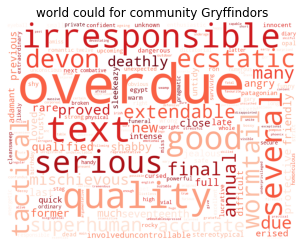

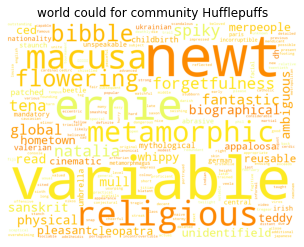

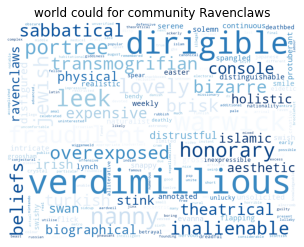

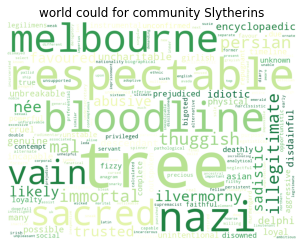

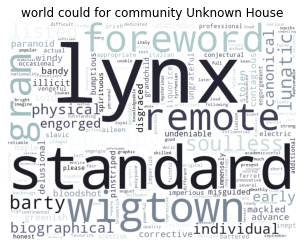

In [55]:
colormap = [ 'Reds','Wistia','Blues','YlGn','bone']
for i,community in enumerate(tf_tr_list):
    draw_wordcloud(community,colormap[i])

这要再写具体一点等下
<br>We can get some key attributes from the wordcloud which make sense to us.
<br>For <b>Gryffindor</b>, the attributes keywords are illustrate as overdue, quality,irresponsible,good,serious,ecstatic,tactical,etc.
<br>
<br>For <b>Hufflepuff</b> should be: variable,newt,religious,macusa,metamorphic,forgetfulness,spiky,etc.
<br>
<br>As for <b>Ravenclaws</b>: dirigible,fraudulent,lovely,jewish,honorary,etc, these words are also described the key features of the college staff to us.
<br>
<br>Meanwhile,known for being combative and caring about pure blood, <b>Slytherins</b> College has key characteristics for its students as follows:respectable,nazi,bloodline,sacred,persian,immortal,vain,thuggish,etc.
<br>
<br>For other people not belonging to the four houses but also within the Hogwards,regarded as <b>Unknown</b> top's character keywords can be summarized as follows: lynx,standard,gossipy,soulless,etc.

#### 3.3 Sentiment anslysis for characters/houses in Harry Potter network

问题描述。

具体步骤。

结果分析。

对学院的情感分析，分析结果。

In [ ]:
!pip install snownlp
!pip install -U textblob
!python -m textblob.download_corpora
!pip install --upgrade gensim

## 3.3.1 preprocessing for text
Divide the book contents into different characters according to their names. Each character is given a text containing the text sentences that appear in the book.<br/>
(1) Pick out the name of characters from nodes and put it into a list after table conversion.<br/>
(2) Traversed the entire text set, followed the punctuation marks at the end of the sentence, and divided the text into a list in units of sentences.<br/>
(3) Loop the nested form to judge whether the character name appears in the sentence.Categorize the sentences that have appeared in the name of the person and save them in the TXT document with the name of the corresponding role.<br/>
(4) For the main characters, considering that in many cases only the first name and last name appear in the sentences, which mostly refer to the main characters,<br/>
So select the last name and first name of the main character to filter the text and override the previous content.<br/>

In [ ]:
import numpy as np
import pandas as pd
import json
import re
import string
import nltk
from nltk.corpus import stopwords
import nltk.stem

(1) Pick out the name of characters from nodes and put it into a list after table conversion.

In [ ]:
# function for standardize the name of txt
def file_rename(characters): 
    character_list = list(characters)
    char_list = []
    for character in character_list:
        char_list.append(character.lower().replace('_',' '))
    character_list = char_list
    return character_list

In [ ]:
# read text from local
book = open('book.txt').read()
# read and parse characters' json document from local
characters = open('nodes_egdes_new.json').read()
characters = json.loads(str(characters))
characters = characters.keys()
character_list = file_rename(characters) # standardize the file name format

(2)Traversed the entire text set, followed the punctuation marks at the end of the sentence, and divided the text into a list in units of sentences.<br/>

In [ ]:
# accoring to punctuations divide book to lists of sentences
sentences_book = re.split("(?<=[.!?])\s+", book.lower())

(3) Loop the nested form to judge whether the character name appears in the sentence.Categorize the sentences that have appeared in the name of the person and save them in the TXT document with the name of the corresponding role.

In [ ]:
# assign the sentences to particular characters
for character in character_list: # loop the characters
    try:
        content = '' # set for collecting all the sentences of particular character
        for sentence in sentences_book: # loop the sentences
            if character in sentence: # if character name be found in the sentence
                content += sentence+'\n'
        if len(content) != 0:    # save the content in local txt which named according to the character name
            path = 'data\{}.txt'.format(character)
            f = open(path, 'w', encoding ='utf-8')
            f.write(content)
            f.close()
    except: 
        pass      
print('done!')

(4) For the main characters, considering that in many cases only the first name and last name appear in the sentences, which mostly refer to the main characters.

In [ ]:
# for some important characters, regard both  the first name and last name valid, to avoid too much content
def rewrite_role(character):
    names = character.split(' ')
    content = ''
    path = 'data\{}.txt'.format(character)
    for sentence in sentences_book:    # judge if the character occured in the sentences
        for name in names:
            if name in sentence:
                content += sentence + '\n'
                continue
    if len(content) > 0:    # rewrite the content of this character
        f = open(path, 'w', encoding ='utf-8') 
        f.write(content)    # rewirte
        f.close()

In [ ]:
# cover the content of main characters in a new way of find their sentences
rewrite_character_list = ['harry potter']
for character in rewrite_character_list:
    rewrite_role(character)
print('done!')

## 3.3.2 Emotional analysis: 
Extract the emotional words from the text, and prepare the dictionary of positive scores for emotional words. The emotional value is using the positive score of word multiply the corresponding multipier which depends on adverb and negative word in the sentence. In this way, we get the sum of a positive score, then divide it by the average length of the text, as the result we can calculate the emotional value corresponding to a piece of text. Comparing to what we have learned of sentiment analysis from lectures, it takes the adverb and nagative words into consideration, that must be more precise.<br/>

Specifically, we imported TextBolb Package to realize the calculation of sentiment value. TextBolb principle is in line with the analysis method of above, and the the specific details of how to use it, you can refer to the tutorial of TextBolb here: https://textblob.readthedocs.io/en/dev/<br/>

TextBlob is an open source text processing library written in Python. It can be used to perform a variety of natural language processing tasks, such as part-of-speech tagging, nominal component extraction, emotion analysis, text translation, and so on. And here we take advantages of it for sentiment analysis, which is pretty simple that you just need input the text, then it will return the positive score of the text.<br/>
The specific details of how it caculate the sentiment score, read here: https://planspace.org/20150607-textblob_sentiment/</br>

Specific steps:<br/>
(1) Traverse all TXT documents in the data directory to read, that is, the text content of all characters.A positive score is calculated for each text using TextBlob, and the result is within the range (-1,1).
The character is named as key value and the value is a tuple, which is stored in positive score and text volume.<br/>
(2) The same method can also be used to analyze the text found on FANDOM.Compare the results.<br/>

In [ ]:
import os
from textblob import TextBlob

sentiment analysis based on the textbook of Harry Potter

In [ ]:
# sentiment analysis
def text_sentiment(file_path):
    sentiment_dict = {} # put the information of posive score and text size for every character into this dictionary
    files = os.listdir(file_path) # get all the txts name
    for file in files:
        path = file_path+file
        f = open(path,'r', encoding = 'utf-8')
        text = f.read()
        blob = TextBlob(text)  # taking usage of TextBolb to caculate the positive score of particular text
        positive_score = blob.sentiment.polarity   # extract out the positive score
        sentiment_dict[file.split('.')[0]] = (positive_score,len(text)) # store the target information in the dictionary
    print('done!')
    return sentiment_dict

In [ ]:
filepath = './data/'
sentiment_dict = text_sentiment(filepath) # caculate the positive score for every characters 
sentiment_dict= dict(sorted(sentiment_dict.items(), key=lambda item:item[1][1], reverse = True)) # sort the dictionary by text size

sentiment analysis based on texts collected from fandom website

In [ ]:
# sentiment analysis for text from web
filepath_web = './cha_fandom_page_text/'
sentiment_web_dict = text_sentiment(filepath_web)
sentiment_web_dict= dict(sorted(sentiment_web_dict.items(), key=lambda item:item[1][1], reverse = True))

In [ ]:
# display the dictionary by size of text descending order
sentiment_web_dict

In [ ]:
# top happniess
sentiment_web_dict= dict(sorted(sentiment_web_dict.items(), key=lambda item:item[1][0], reverse = True))
sentiment_web_dict

In [ ]:
#top sadness
sentiment_web_dict= dict(sorted(sentiment_web_dict.items(), key=lambda item:item[1][0], reverse = False))
sentiment_web_dict

## 3.3.3 Character similarity: 
The characteristics of characters are reflected in the text corresponding to them, so the similarities between texts can be regard as the similarity degree between characters. In this part, we used some packages in NLP filed that mainly from gensim. <br/>
    The calculation method is to vectorize the text corresponding to each character. By structuring the vectors of all characters into a vector space model, the similarity between characters can be calculated by caculating the angles between their vectors. The Angle between the vectors is $\cos(\Theta) = 
 \frac{u.v}{|u||v|}
 $. 
We used the Gensim package. <br/>

Introduction to Gensim: Gensim is an open source Python toolkit for unsupervised learning from raw, unstructured text to topic vector representations at a textual level of implicit text.It supports a variety of topic model algorithms including TF-IDF, LSA, LDA, and Word2VEC, supports streaming training, and provides API interfaces for common tasks such as similarity calculation and information retrieval.<br/>
Tutorial of Gensim: https://radimrehurek.com/gensim/models/word2vec.html <br/>

Packages of gensim we used: <br/>

(1) doc2bow: <br/>
&ensp;&ensp;&ensp;&ensp;Doc2Bow is a method encapsulated in Gensim and is primarily used to implement the Bow model, which ignores the elements such as the grammar and word order of the text, and regards it as a collection of several words, and the appearance of each word in the document is independent.The BoW uses an unordered set of words to represent a paragraph of text or a document.<br/>
(2) gensim.corpus.Dictionary:<br/>
&ensp;&ensp;&ensp;&ensp;Actually it is a dictionary in python, which key is the word, and its value is the unique numeric ID corresponding to the word<br/>
(3) gensim.models.TfidfModel:<br/>
&ensp;&ensp;&ensp;&ensp; The function of this model is compute TF-IDF by multiplying a local component (term frequency) with a global component (inverse document frequency), and normalizing the resulting documents to unit length.<br/>
(4) gensim.similarities.SparseMatrixSimilarity<br/>
&ensp;&ensp;&ensp;&ensp;This is for modeling the SVM of input corpus contains sparse vectors like TF-IDF. It returns the well built SVM according to the input texts.<br/>


Specific steps:<br/>
(1) Read character text through the data directory, clean each text, remove stop words, punctuation and so on, and store them in a list used to store all text data.<br/> 
(2) Extract the set of words from the text set as characteristic phrases.<br/> 
(3) TF-IDF of text feature words is calculated according to feature phrases and text sets.<br/>
(4) Construct the text vector, each feature word as a direction of the vector, the feature word appearing in a certain text multiplied by the corresponding TF-IDF, that is, get the moduli in the semantic direction of the word. In this way, we have successfully represented the text as a vector and transformed the text content into data that the computer can recognize.<br/>
(5) GenSIM builds vector space model. In the vector space model of text, each text has a vector representation.
Each of these vectors can be decomposed into a vector of individual feature words.<br/>
(6) Semantic similarity calculation. The target text is transformed into word vector, put into vector space model, and the cosine value between two vectors is calculated by cosine formula. This cosine can be used to represent the similarity between texts.

In [2]:
from os import listdir
import nltk
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import SparseMatrixSimilarity

(1) Read character text through the data directory, clean each text, remove stop words, punctuation and so on, and store them in a list used to store all text data.

In [ ]:
# This process convert the original character texts in the document into sparse vectors that can be understood by the Gensim model.
def clean_text(doc):
    doc = doc.split('.')[0]
    doc = doc+'.txt'
    ws = open(data_dir + doc, 'r', encoding='UTF-8').read()
    ws = ws.translate(str.maketrans('', '', '"#$%&\()*+,-/:;<=>@[\\]^_`{|}~.!?')) # remove punctuations               
    ws = nltk.word_tokenize(ws)  
    ws = [w.lower() for w in ws if not w in stopwords.words('english')] 
    return ws

In [ ]:
# catch all the texts into a 2d list for later training
data_dir = "./data/"
docLabels = [f for f in listdir(data_dir) if f.endswith('.txt')]
data = []
for doc in docLabels:
    data.append(clean_text(doc))

(2) Extract the set of words from the text set as characteristic phrases.

In [ ]:
# taking usage of gensim.corpus.Dictionary which key is the word, and value is the unique numeric ID corresponding to the word
word_dictionary = Dictionary(data)

(3) TF-IDF of text feature words is calculated according to feature phrases and text sets.

In [ ]:
# based on the dict we got, transfer the word_vec to be corpus sets
corpus = [word_dictionary.doc2bow(text) for text in data]
# build the tf-idf model, then input it  into the corpus sets for training
tfidf = TfidfModel(corpus)

(4) Construct the text vector, each feature word as a direction of the vector, the feature word appearing in a certain text multiplied by the corresponding TF-IDF, that is, get the moduli in the semantic direction of the word. In this way, we have successfully represented the text as a vector and transformed the text content into data that the computer can recognize.

In [ ]:
# to handle the text by the usage of tf-idf model
tf_texts = tfidf[corpus] 

(5) GenSIM builds vector space model.In the vector space model of text, each text has a vector representation. Each of these vectors can be decomposed into a vector of individual feature words.

In [ ]:
# build the similiarity matrix which will be used for caculating simularities between  characters
num_feature = len(word_dictionary.token2id) #set the number of eigenvectors equal to the size of word set
sparse_matrix = SparseMatrixSimilarity(tf_texts, num_feature) # building the SVM of text vectors

(6) Semantic similarity calculation. The target text is transformed into word vector, put into vector space model, and the cosine value between two vectors is calculated by cosine formula. This cosine can be used to represent the similarity between texts.

In [ ]:
def clean_text_2(text): # removing punctuations and stopwords and tokenize the text, then put the outcome into a list for return.  
    ws =text.translate(str.maketrans('', '', '"#$%&\()*+,-/:;<=>@[\\]^_`{|}~.!?')) # remove punctuations               
    ws = nltk.word_tokenize(ws)  
    ws = [w.lower() for w in ws if not w in stopwords.words('english')] 
    return ws

# this function works for caculate the similarity of a text with the texts in the SVM.
def caculate_similarity(character,isOwntxt = 0): # is your own input text or not
    if isOwntxt == 0: # if the input is the name of characters in harry potter, find the text from local and then clean it. 
        keywords = clean_text(character)
    else:             # else the input is the text, just clean it. 
        keywords = clean_text_2(character)
    kw_vector = word_dictionary.doc2bow(keywords) #transfer the cleaned text to the standard format for vectorization
    tf_kw = tfidf[kw_vector] # caculate the tf-idf of input text
    similarities = sparse_matrix.get_similarities(tf_kw) # caculate the similiarity of input text and texts in the SVM
    similarity_dict = {} # this dictionary will be used to store the information of similarities
    for e, s in enumerate(similarities, 1):
        name = docLabels[e-1].split('.')[0]
        similarity_dict[name] = s  # the key is the character name and the value is the similarty value of this character to input text
    similarity_dict= dict(sorted(similarity_dict.items(), key=lambda item:item[1], reverse = True)) # sort the dictionary by its value
    return similarity_dict

def one2one_similarity(character_1,character_2,isOwntxt = 0): # input two character names, or one of your own text and another character
    if isOwntxt == 0: # if the input of character2 is a character name in harry potter, find the text in local and clean it
        keywords = clean_text(character_2)
    else:             # else theinput of character2 will be text, that just clean it
        keywords = clean_text_2(character_2) 
    kw_vector = word_dictionary.doc2bow(keywords) # transfer the cleaned text to the standard format for vectorization
    tf_kw = tfidf[kw_vector] # caculate tf-idf
    similarities = sparse_matrix.get_similarities(tf_kw) # caculate the similiarity of input text and texts in the SVM
    similarity_dict = {}
    for e, s in enumerate(similarities, 1):
        name = docLabels[e-1].split('.')[0]
        similarity_dict[name] = s      
    return similarity_dict[character_1.split('.')[0]] # return the similarity of character1 and chracter2(this maybe your own input text)

In [ ]:
caculate_similarity('harry potter')

In [ ]:
text = 'Marry is really so charming, who always be so nice to others'
caculate_similarity(text,1)

In [ ]:
one2one_similarity('harry potter','who is so handsome and really nice guy',1)

#### 3.4 Community detection using text informaion

问题描述。（为什么要这么做要讲清楚）

具体步骤：  
提取文本向量： 具体怎么做的；
相似度：公式；
生成权重；
社区检测（具体算法以及算法如何运行的）

结果分析。与分院帽结果对比。分析分析分析。

Just as described in section 3.2, in Hogwarts, students would be assigned to four different houses: Gryffindor, Hufflepuff, Ravenclaw and Slytherin in their first year. The Sorting Hat takes this job as it could magically determines which of the four school Houses each new student belongs most to. We are very curious about whether the sorting hat is giving convincing result, therefore we'd like to conduct community detection in the Hogwarts subnetwork, and then compare the result with the original sorting result.  

Firstly we applied the louvain algorithm by the simple network structure inside Hogwarts. The result shows that it cares more about the links between characters, and this realtionship varies a lot compared with the original house list. 

Then we notice that the weight information is being ignored in the community detection, as we set the weight to 1 by default. However, when character A knows both character B and C, the closeness of them might not be the same, A and B might be a couple while A and C are classmates who haven't talked much. 

We here designed the weights of link by the text of the two corresponding nodes. To be more sepecific, each links connect two nodes(characters), we firstly obtain the text from Fandom page of these two characters, then use *gensim* library to calculate the similarity of these two text which is set as the weight of this link. Finally, we implement community detection in this weighted network.

In [71]:
# import necessary library
import json
import networkx as nx
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
import os
from fa2 import ForceAtlas2
from community import community_louvain
import matplotlib.pyplot as plt

**Step 1:**   
Firstly, we generate the subnetwork for Hogwarts. In this step, the whole network for Harry Potter is bulit and then extract the Hogwarts sub-network from the Hogwarts character list. The Hogwarts network contains 957 nodes and 3641 edges.

In [59]:
# bulid the whole network 
nodes_edges_json_file = './data/nodes_egdes_new.json'
with open(nodes_edges_json_file,'r') as f:
    node_edges = json.load(f)

# bulid the network from data 
G = nx.DiGraph()

# add nodes    
G.add_nodes_from(node_edges.keys())

# add links
for each in node_edges:
    for link in node_edges[each]:
        G.add_edge(each,link)
G_undirect = G.to_undirected()

hogwarts = './data/hogwarts_house.json'
with open(hogwarts,'r') as f:
    hogwarts = json.load(f)

# get the character list of hogwarts
character_hogwarts = []
for house in hogwarts:
    for cha in hogwarts[house]:
        name = cha.replace(' ','_')
        character_hogwarts.append(name)

# get the subgragh
G_Hogwarts = G_undirect.subgraph(character_hogwarts)
# basic stat
print('number of nodes in Hogwarts network:{}'.format(len(G_Hogwarts.nodes())))
print('number of links in Hogwarts network:{}'.format(len(G_Hogwarts.edges())))     

number of nodes in Hogwarts network:957
number of links in Hogwarts network:3641


**Step 2:**   
Get the Fandom page text for each character and calculate the similarity for all pairs in edges.  

The detiled information about how to calculate the similarity between texts of characters is below:


<font color = steelblue size = 4>**Character similarity calculation:**</font>   
The characteristics of characters are reflected in the text corresponding to them, so the similarities between texts can be regard as the similarity degree between characters. In this part, we used some packages in NLP filed that mainly from gensim. <br/>
The calculation method is to vectorize the text corresponding to each character. By structuring the vectors of all characters into a vector space model, the similarity between characters can be calculated by caculating the angles between their vectors. The Angle between the vectors is (cos theta = (u.v)/|u||v|). 
We used the Gensim package. <br/>

**Tutorial of Gensim:** https://radimrehurek.com/gensim/models/word2vec.html <br/>
**Introduction to Gensim:**<br/>
(1) doc2bow:<br/>
(2) gensim.corpus.Dictionary:<br/>
(3) gensim.models.TfidfModel:<br/>
(4) gensim.similarities.SparseMatrixSimilarity<br/>


**Specific steps:**<br/>
(1) Read character text through the data directory, clean each text, remove stop words, punctuation and so on, and store them in a list used to store all text data.<br/> 
(2) Extract the set of words from the text set as characteristic phrases.<br/> 
(3) TF-IDF of text feature words is calculated according to feature phrases and text sets.<br/>
(4) Construct the text vector, each feature word as a direction of the vector, the feature word appearing in a certain text multiplied by the corresponding TF-IDF, that is, get the moduli in the semantic direction of the word. In this way, we have successfully represented the text as a vector and transformed the text content into data that the computer can recognize.<br/>
(5) GenSIM builds vector space model.In the vector space model of text, each text has a vector representation.
Each of these vectors can be decomposed into a vector of individual feature words.<br/>
(6) Semantic similarity calculation.The target text is transformed into word vector, put into vector space model, and the cosine value between two vectors is calculated by cosine formula. This cosine can be used to represent 

Get the word list for each character. Firstly, read the txt file which contains the content for each Famdom page. Then, generate the cleaned word list. Notice that in the cleaning step, all punctuation mark is removed and all words are converted to lowercase. When we do this step at the first time, we store the word list for each Fandom page, which could save time if we run this notebook again.

In [60]:
# data folder 
data_dir = './data/cha_fandom_page_text/'

# function for clean the text
def clean_text(doc):
    ws = open(data_dir + doc, 'r', encoding='UTF-8').read()
    ws = ws.translate(str.maketrans('', '', '"#$%&\()*+,-/:;<=>@[\\]^_`{|}~.!?')) # remove punctuations               
    ws = nltk.word_tokenize(ws)  
    ws = [w.lower() for w in ws if not w in stopwords.words('english')] 
    return ws

# nodes name in Hogwarts 
docLabels = [f for f in G_Hogwarts.nodes()]

In [ ]:
# get the word list for each text file and store them into txt file
# If you have done this step you could skip this 
save_folder = './data/cha_word_list_fandom/'

data = []
for doc in tqdm(docLabels):
    doc = doc+'.txt'
    word_list = clean_text(doc)
    with open(os.path.join(save_folder,doc),'w') as f:
        json.dump(word_list,f)
    data.append(word_list)
print(len(data))

In [61]:
# get the data 
word_list_each = []
folder = './data/cha_word_list_fandom/'
for node in G_Hogwarts.nodes():
    file_path = os.path.join(folder,node+'.txt')
    with open(file_path,'r') as f:
        data_ = json.load(f)
    data_ = list(data_)
    word_list_each.append(data_)

Now we get the sparse_matrix from *gensim*. This matrix is the space vector model we got through training, which stored the text vectors, and just put a new vector format of text into it then calculating the cosine value with every other vector. Actually the cosine value is the parameter could present the similarity between vectors.

In [63]:
# gee the sparse matrix
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import SparseMatrixSimilarity

word_dictionary = Dictionary(word_list_each)
num_feature = len(word_dictionary.token2id)
# print(num_feature)
# based on the dict we got, transfer the word_vec to be corpus sets
corpus = [word_dictionary.doc2bow(text) for text in word_list_each]
# build the tf-idf model, then input it  into the corpus sets for training
tfidf = TfidfModel(corpus)
# to handle the text by the usage of tf-idf model
tf_texts = tfidf[corpus] 
# build the similiarity matrix which will be used for caculating simularities between  characters
# num_features = 500
sparse_matrix = SparseMatrixSimilarity(tf_texts, num_feature)

**Step 3:**  
Get the weights from text similarities, store the weights file and add the weights attributes as link attributes to Network.

Firstly,we define a function which could return the similarities between one node and the other nodes. Then we calculate the similarity for each link, and store it as *weights*.

In [64]:
def caculate_similarity(character,isOwntxt = 0): # is your own input text or not
    if isOwntxt == 0:
        doc_name= character+'.txt'
        keywords = clean_text(doc_name)
    else:
        print('wrong')
    kw_vector = word_dictionary.doc2bow(keywords)
    tf_kw = tfidf[kw_vector]
    similarities = sparse_matrix.get_similarities(tf_kw)
    similarity_dict = {}
    for e, s in enumerate(similarities, 1):
        name = docLabels[e-1]
        similarity_dict[name] = s
        
    similarity_dict= dict(sorted(similarity_dict.items(), key=lambda item:item[1], reverse = True))
    return similarity_dict

In [67]:
# print('it takes around 10 minute be paticent')
weights = {}
for node in tqdm(G_Hogwarts.nodes()):
    # calculate the similrity with 'node'
    simi_dict = caculate_similarity(node)
    edges = G_Hogwarts.edges(node)
    # print('{}:{}'.format(node,edges))
    weights[node] = {}
    for e in edges: 
        node2 = e[1]
        # print(node2)
        simi = simi_dict[node2]
        weights[node][node2] = simi_dict[node2]


100%|████████████████████████████████████████████████████████████████████████████████| 957/957 [26:28<00:00,  1.66s/it]


The weights are stored in local to save time for feature runs.

In [68]:
weigths_str = {}
for node in weights.keys():
    weigths_str[node] = {}
    for e in weights[node]:
        weigths_str[node][e] = str(weights[node][e])
file_path = './data/simi_as_weights.json'
with open(file_path,'w') as f:
    json.dump(weigths_str,f)

Add the weights to Hogwarts Network.

In [132]:
for node_1 in weights.keys():
    edges = weights[node_1].keys()
    for node_2 in edges:
        G_Hogwarts[node_1][node_2]['weight'] = weights[node_1][node_2]

In [133]:
# the network with weight 1 
G_Hogwarts_unweighted = G_Hogwarts.copy()
for node_1 in weights.keys():
    edges = weights[node_1].keys()
    for node_2 in edges:
        G_Hogwarts_unweighted[node_1][node_2]['weight'] = 1

In [134]:
G_Hogwarts.get_edge_data('Cedric_Diggory',"Unidentified_girls_in_the_Gryffindor_Girls'_Dormitory_(1993-1994)")

{'weight': 0.08328011}

In [135]:
G_Hogwarts_unweighted.get_edge_data('Cedric_Diggory',"Unidentified_girls_in_the_Gryffindor_Girls'_Dormitory_(1993-1994)")

{'weight': 1}

**Step 4:**  
Now, we are ready for **community detection**! Firstly, we'd like to visualize the network with their original attribute (by sorting hat). Then we apply the louvain algorithm for both unweighted and weighted network and discuss the result.

Firstly, we visualize network with the orignal house label.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.58it/s]


BarnesHut Approximation  took  0.77  seconds
Repulsion forces  took  6.28  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.08  seconds


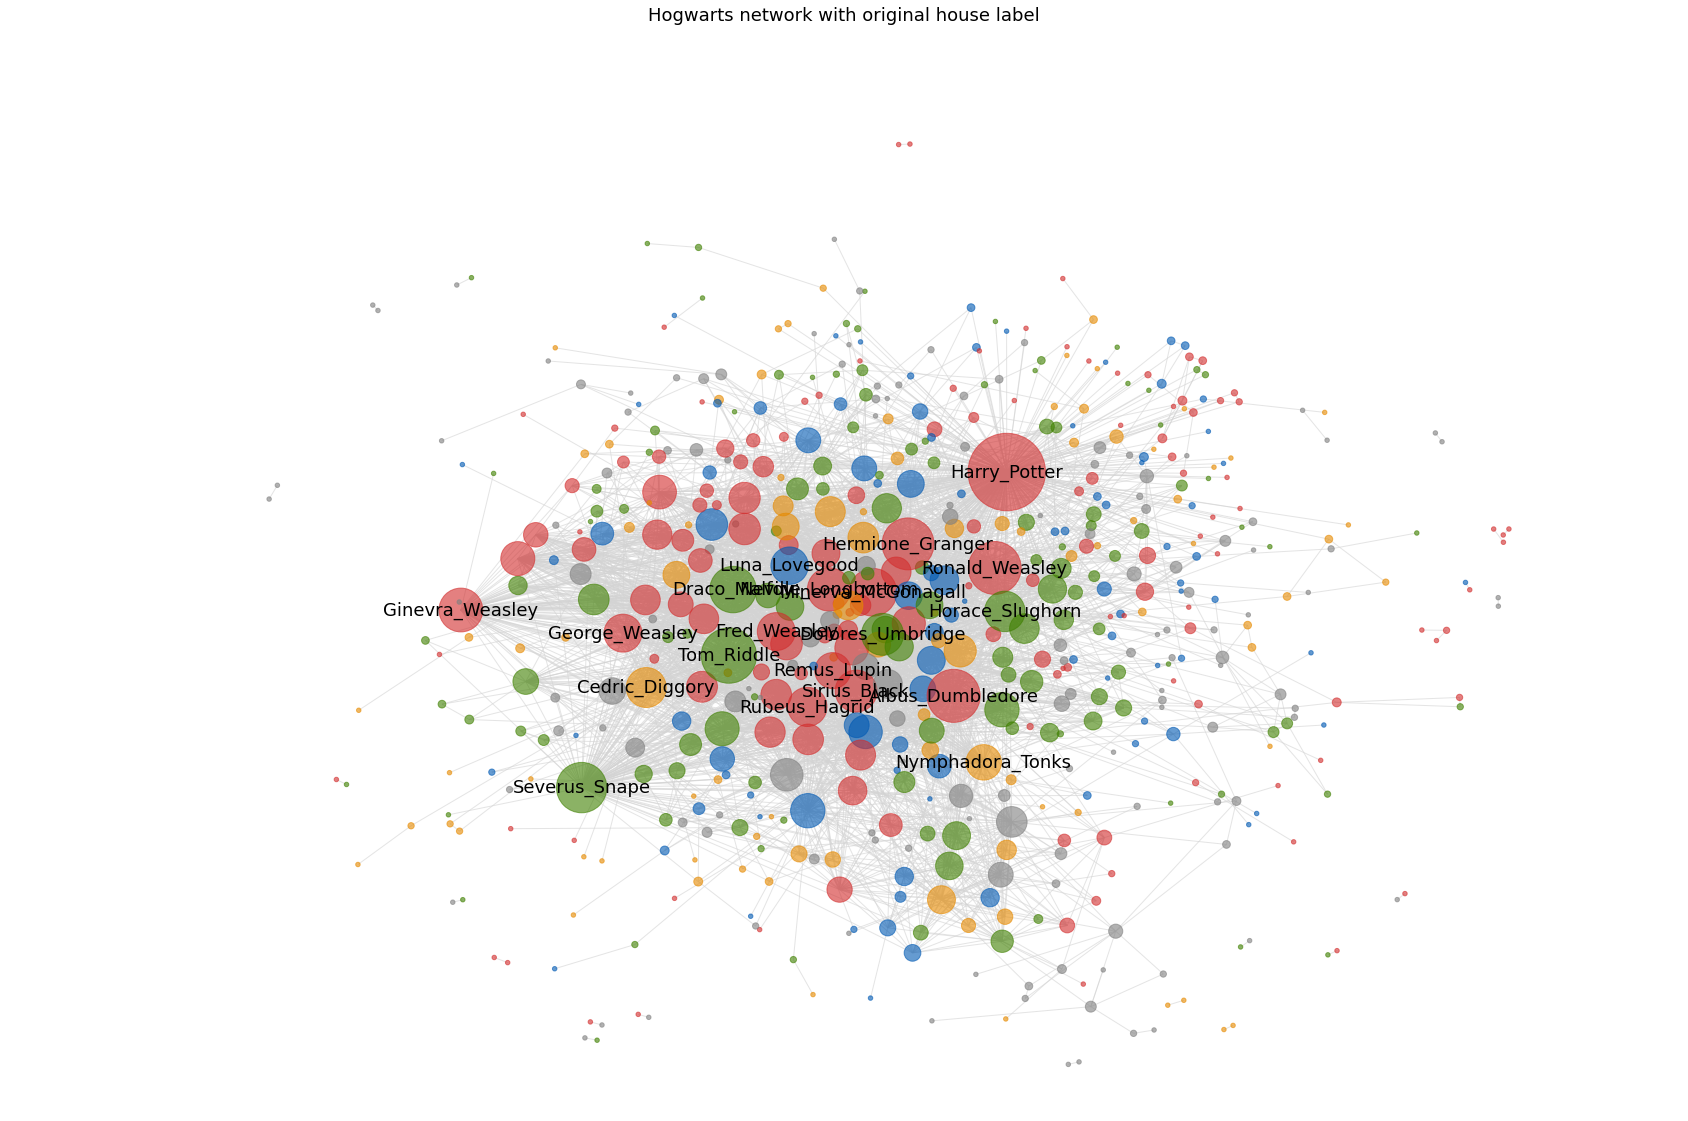

In [142]:
# visualize network with the orignal house label.


# get the dict of degree in G undirected 
d = dict(G_Hogwarts_unweighted.degree)
d_sorted = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
# the top 20 degree - characters 
top_20_cha = list(d_sorted.keys())[0:20]

# represent for Gryffindors, Hufflepuffs, Ravenclaws and Slytherins respectively (and also unknow ones)
colors = ['#d22d2d','#e68a00','#0059b3','#3f8000','#808080']

# color map for nodes
color_map_nodes = []
for node in list(G_Hogwarts.nodes()):
    if node.replace('_',' ') in  hogwarts['Gryffindors']:
        color_map_nodes.append(colors[0])
    elif node.replace('_',' ') in  hogwarts['Hufflepuffs']:
        color_map_nodes.append(colors[1])
    elif node.replace('_',' ') in  hogwarts['Ravenclaws']:
        color_map_nodes.append(colors[2])
    elif node.replace('_',' ') in  hogwarts['Slytherins']:
        color_map_nodes.append(colors[3])
    else:
        color_map_nodes.append(colors[4])
    
plt.figure(figsize=(30,20))

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.001, #More makes a more sparse graph
                        strongGravityMode=False,
                        gravity=1.2, # increse this, the nodes will be attracted to the center more

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G_Hogwarts_unweighted, pos=None, iterations=100)
nx.draw_networkx(G_Hogwarts_unweighted, positions,nodelist=d.keys(), node_size=[v * 20 for v in d.values()], node_color = color_map_nodes,alpha = 0.6,\
                    edge_color ='lightgrey',with_labels=False)
labels = {}
for node in top_20_cha:
    labels[node] = node
nx.draw_networkx_labels(G_Hogwarts_unweighted,positions,labels,font_size=18,font_color='k')
plt.title('Hogwarts network with original house label',fontdict = {'fontsize' : 18})
plt.axis('off')
plt.show()


Apply the louvain algorithm for both unweighted and weighted network and discuss the result. Louvain algorithm is a kind of community detection method based on modularity, below we give the detiled algorithm for it.

<font color=steelblue size = 4> **Louvain algorithm:**</font>

需要写

After get the partition from Louvain algorithm, variables about the partition are generated like *community* which contains the node in each community and use the community name as key. Then we color each node with its' new community, and visualize the network.

In [143]:

partition = community_louvain.best_partition(G_Hogwarts_unweighted)
par_class = set(partition.values())
par_class_dict = {}
for v in partition.values():
    str_v = str(v)
    if str_v not in par_class_dict.keys():
        par_class_dict[str_v] = 1
    else:
        par_class_dict[str_v] += 1
par_sorted = sorted(par_class_dict.items(),key= lambda item:item[1],reverse = True)
# print(par_sorted[:10])
selected_par = list(dict(par_sorted).keys())[:5]
# print(selected_par)

community = {}
for par in selected_par:
    com_name = 'com_'+str(par)
    community[com_name] = []
community['other'] = []

for node in G_Hogwarts.nodes():
    if str(partition[node]) in selected_par:
        com_name = 'com_'+str(partition[node])
        community[com_name].append(node)
    else:
        community['other'].append(node)

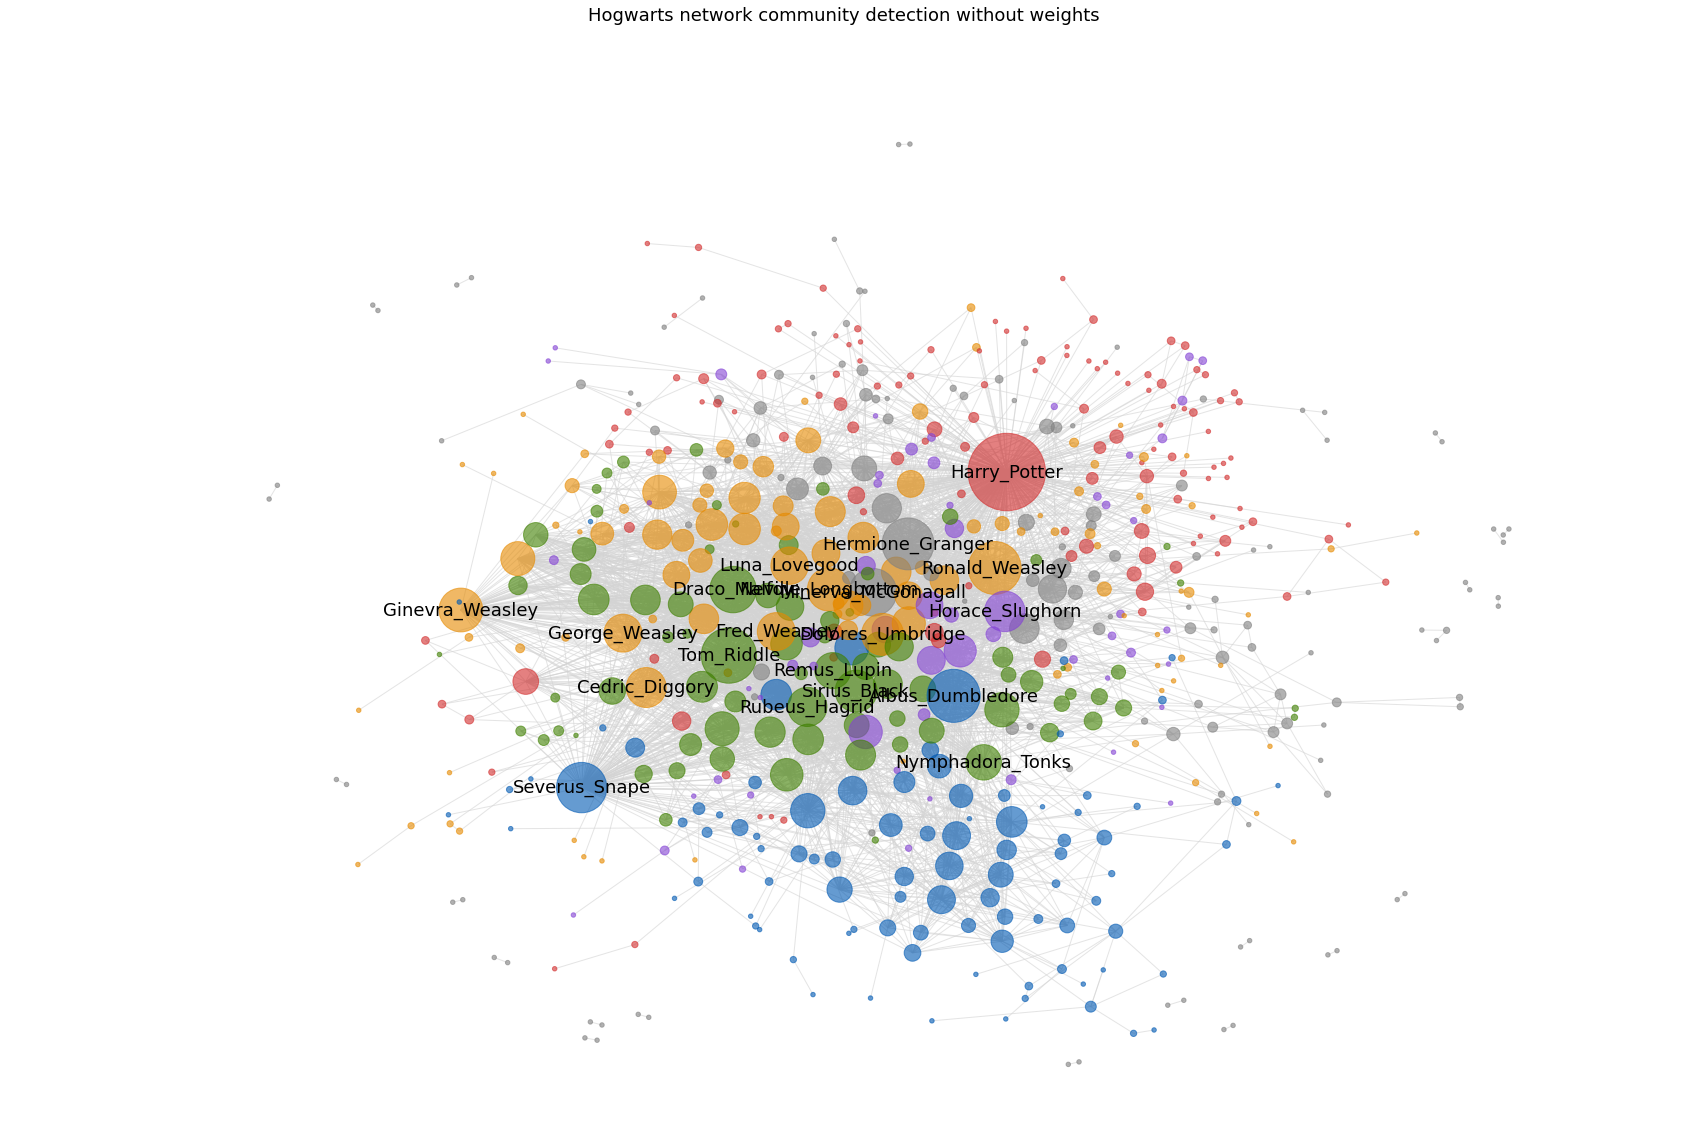

In [144]:
colors = ['#d22d2d','#e68a00','#0059b3','#3f8000','#8443D5','#808080'] # 5 main community + other

# create a dict for each community
color_dict = {}
for i,par in enumerate(selected_par):
    color_dict[par] = colors[i]
color_dict['other'] = colors[-1]

# color map for nodes
color_map_nodes_2 = []
for node in list(G_Hogwarts_unweighted.nodes()):
    if str(partition[node]) in selected_par:
        color = color_dict[str(partition[node])]
    else:
        color = color_dict['other'] 
    color_map_nodes_2.append(color)

plt.figure(figsize=(30,20))
nx.draw_networkx(G_Hogwarts_unweighted, positions,nodelist=d.keys(), node_size=[v * 20 for v in d.values()], node_color = color_map_nodes_2,alpha = 0.6,\
                    edge_color ='lightgrey',with_labels=False)
labels = {}
for node in top_20_cha:
    labels[node] = node
nx.draw_networkx_labels(G_Hogwarts_unweighted,positions,labels,font_size=18,font_color='k')
plt.title('Hogwarts network community detection without weights',fontdict = {'fontsize' : 18})
plt.axis('off')
plt.show()

Then we implement the Louvain algorithm again with weighted netword and see the result.

In [145]:
G_Hogwarts.get_edge_data('Cedric_Diggory',"Unidentified_girls_in_the_Gryffindor_Girls'_Dormitory_(1993-1994)")

{'weight': 0.08328011}

In [146]:
# louvain_partition = community.best_partition(G, weight='weight')
partition = community_louvain.best_partition(G_Hogwarts,weight='weight')
par_class = set(partition.values())
par_class_dict = {}
for v in partition.values():
    str_v = str(v)
    if str_v not in par_class_dict.keys():
        par_class_dict[str_v] = 1
    else:
        par_class_dict[str_v] += 1
par_sorted = sorted(par_class_dict.items(),key= lambda item:item[1],reverse = True)
# print(par_sorted[:10])
selected_par = list(dict(par_sorted).keys())[:5]
# print(selected_par)

community = {}
for par in selected_par:
    com_name = 'com_'+str(par)
    community[com_name] = []
community['other'] = []

for node in G_Hogwarts.nodes():
    if str(partition[node]) in selected_par:
        com_name = 'com_'+str(partition[node])
        community[com_name].append(node)
    else:
        community['other'].append(node)

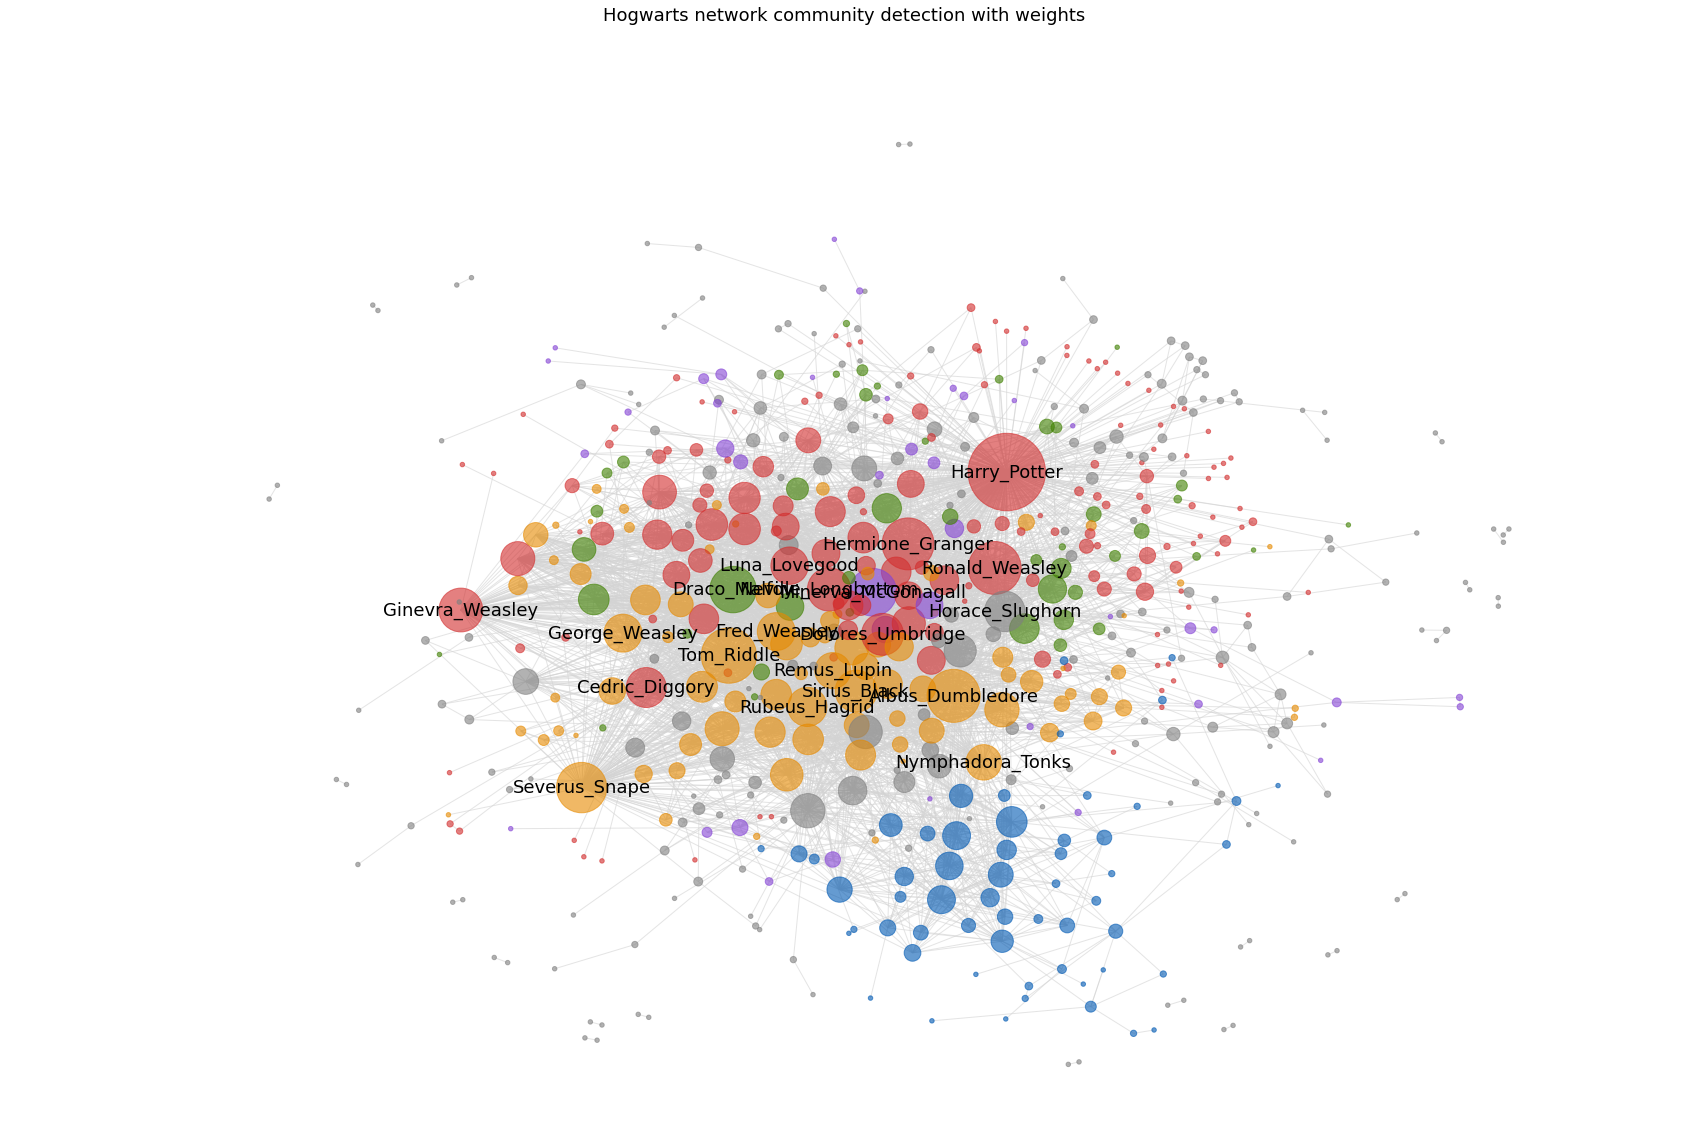

In [147]:
colors = ['#d22d2d','#e68a00','#0059b3','#3f8000','#8443D5','#808080'] # 5 main community + other

# create a dict for each community
color_dict = {}
for i,par in enumerate(selected_par):
    color_dict[par] = colors[i]
color_dict['other'] = colors[-1]

# color map for nodes
color_map_nodes_2 = []
for node in list(G_Hogwarts.nodes()):
    if str(partition[node]) in selected_par:
        color = color_dict[str(partition[node])]
    else:
        color = color_dict['other'] 
    color_map_nodes_2.append(color)

plt.figure(figsize=(30,20))
nx.draw_networkx(G_Hogwarts, positions,nodelist=d.keys(), node_size=[v * 20 for v in d.values()], node_color = color_map_nodes_2,alpha = 0.6,\
                    edge_color ='lightgrey',with_labels=False)
labels = {}
for node in top_20_cha:
    labels[node] = node
nx.draw_networkx_labels(G_Hogwarts,positions,labels,font_size=18,font_color='k')
plt.title('Hogwarts network community detection with weights',fontdict = {'fontsize' : 18})
plt.axis('off')
plt.show()

【讨论】  
有一些很值得关注的差异。比如哈利波特的点，邓布利多的点。 为什么会造成这样的差异。  
分出来的社区的含义是什么。

用那个什么算一下（记得有一个 modularity？ 不知道要不要这步）

#### 3.5 Prediction your house with description test

问题描述。（为什么研究这个 有什么意义）

具体步骤。

结果分析。

### 4. Discussion
<!--
* What went well?,
* What is still missing? What could be improved?, Why?
-->

#### 4.1 Summary on our result

其实我不知道这边还能讲啥。一般discussion可能会说一些延伸的东西。



#### 4.2 Problems and possible improvement

潜在的问题以及可能的解决办法。未来的方向。